In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/media/raian/Projects/Datasets/UCI-HeartDisease/processed.cleveland_test.csv', header=None)
df
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.shape

(303, 14)

In [4]:
# count of tuples in class 1,2,3,4

df['target'][df['target']>0].value_counts().sum()

139

In [5]:
# converting to binary class
# replace class 1,2,3,4 by 1

df['target'] = df['target'].mask(df['target']>0, 1)

# count of tuples in class 1 after replacement

df['target'][df['target'] == 1].value_counts().sum()

139

In [6]:
# Find missing values '?'

for i in range(0,df.shape[0]):
    for j in range(0,df.shape[1]):
        if df.iloc[i,j] == '?':
            print(df.columns[j],i,df.iloc[i,j])


thal 87 ?
ca 166 ?
ca 192 ?
thal 266 ?
ca 287 ?
ca 302 ?


In [7]:
# Correlation Matrix

def correlation(method_name,threshold):
    plt.figure(figsize=(10,8))
    corr = df.corr(method = method_name)
    sns.heatmap(corr, annot = True)
    plt.show()
    
# Correlation with output variable
 
    corr_target = abs(corr["target"])

# Highly correlated features 

    relevant_features = corr_target[corr_target > threshold]
    print(relevant_features)
    return relevant_features

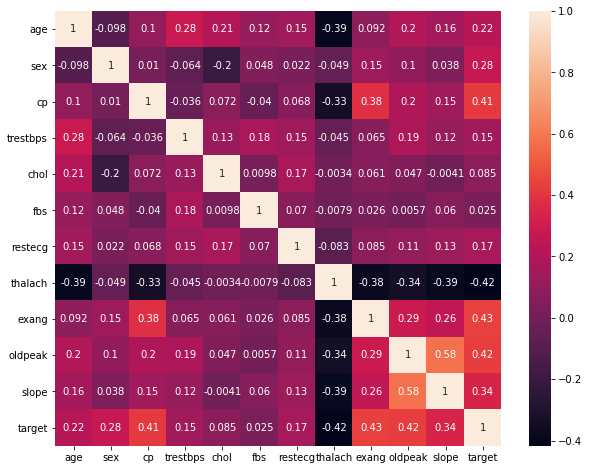

cp         0.414446
thalach    0.417167
exang      0.431894
oldpeak    0.424510
target     1.000000
Name: target, dtype: float64


,pearson
cp,0.414446
thalach,0.417167
exang,0.431894
oldpeak,0.424510
target,1.000000


In [8]:
# Dataframe corr contains strong correlation with target attribute 
# Three types of correlation methods are used: Pearson, Kendall, Spearman

corr = pd.DataFrame()

corr['pearson'] = correlation("pearson",0.4)
corr

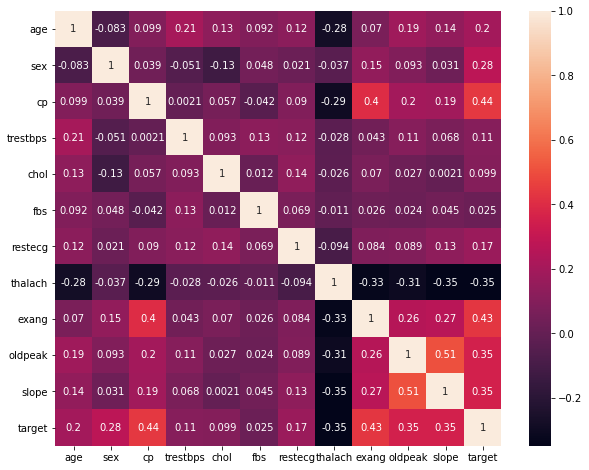

cp        0.440972
exang     0.431894
target    1.000000
Name: target, dtype: float64


,pearson,kendall
cp,0.414446,0.440972
thalach,0.417167,NaN
exang,0.431894,0.431894
oldpeak,0.424510,NaN
target,1.000000,1.000000


In [9]:
corr['kendall'] = correlation("kendall",0.4)
corr

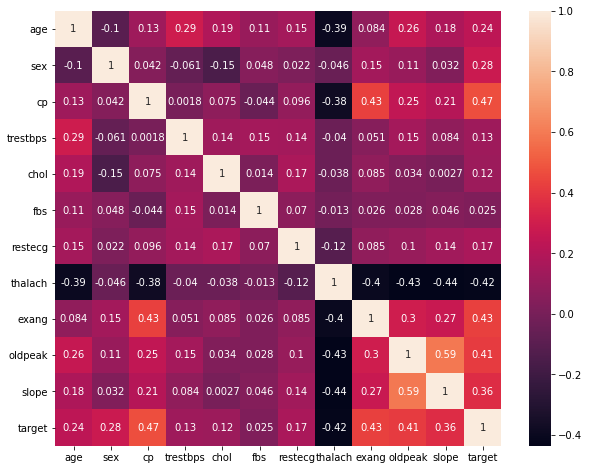

cp         0.472006
thalach    0.423467
exang      0.431894
oldpeak    0.413382
target     1.000000
Name: target, dtype: float64


,pearson,kendall,spearman
cp,0.414446,0.440972,0.472006
thalach,0.417167,NaN,0.423467
exang,0.431894,0.431894,0.431894
oldpeak,0.424510,NaN,0.413382
target,1.000000,1.000000,1.000000


In [10]:
corr['spearman'] = correlation("spearman",0.4)
corr

In [11]:
# Replace '?' by np.nan

df = df.replace('?',np.nan)

# Find missing values np.nan

df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [12]:
# Impute np.nan with Most Frequent values

df_imp = df.copy(deep=True)
df_imp
imp = SimpleImputer(strategy='most_frequent')
df_imp = pd.DataFrame(imp.fit_transform(df_imp),columns=df_imp.columns)
df_imp
df_imp.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

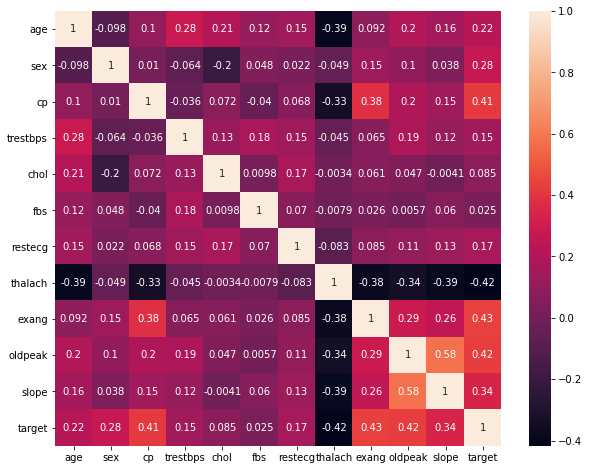

cp         0.414446
thalach    0.417167
exang      0.431894
oldpeak    0.424510
target     1.000000
Name: target, dtype: float64


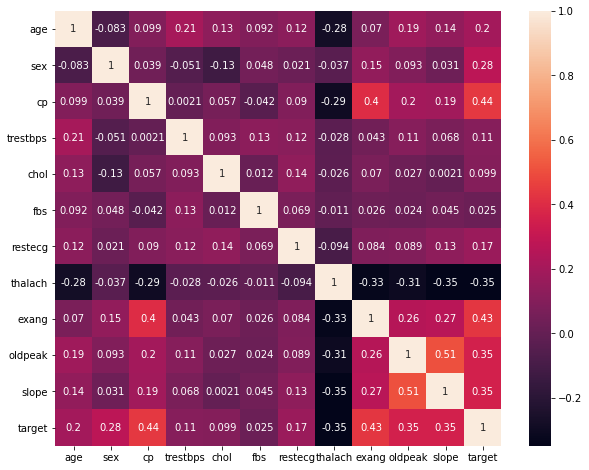

cp        0.440972
exang     0.431894
target    1.000000
Name: target, dtype: float64


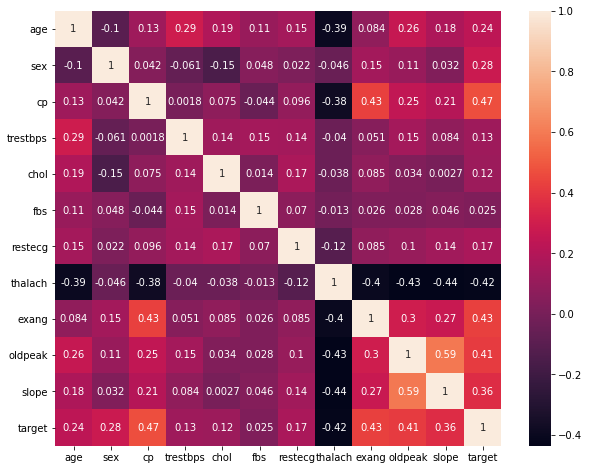

cp         0.472006
thalach    0.423467
exang      0.431894
oldpeak    0.413382
target     1.000000
Name: target, dtype: float64


,pearson,kendall,spearman
cp,0.414446,0.440972,0.472006
thalach,0.417167,NaN,0.423467
exang,0.431894,0.431894,0.431894
oldpeak,0.424510,NaN,0.413382
target,1.000000,1.000000,1.000000


In [13]:
corr_imp = pd.DataFrame()
corr_imp['pearson'] = correlation("pearson",0.4)
corr_imp['kendall'] = correlation("kendall",0.4)
corr_imp['spearman'] = correlation("spearman",0.4)
corr_imp

In [14]:
# After performing Impuation for the six missing values (by most frequent value), correlation of 
# the attributes with the target attribute remains exactly same 

corr.equals(corr_imp)

True

In [15]:
df.ca = df.ca.astype('float64')
df.thal = df.thal.astype('float64')
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [16]:
df_imp = df_imp.astype('float64')
df_imp.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

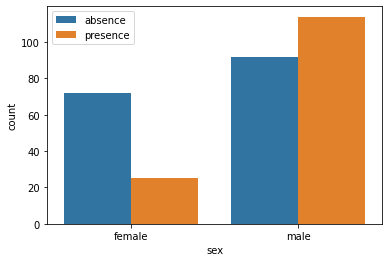

In [17]:
# 1 = Male, 0 = Female
# 1 = Presence, 0 = Absence

ax = sns.countplot("sex",hue="target",data=df)
ax.set_xticklabels(["female","male"])
ax.legend(["absence","presence"])

In [18]:
df['ca'].std() - df_imp['ca'].std()

0.0030628554897143

In [19]:
df['ca'].std(ddof=0) - df_imp['ca'].std(ddof=0)

0.0030370679438613823

In [20]:
df['thal'].std() - df_imp['thal'].std()

0.001323096022328496

In [21]:
df['thal'].std(ddof=0) - df_imp['thal'].std(ddof=0)

0.0012996075871449797

In [22]:
X = df_imp.drop(['target'],axis=1)

y = df['target']

# Apply a Classification Algorithm

In [224]:
# define the model

def classification(X_data, cls_name, scoring_method):
    model = cls_name
    
# evaluate model

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X_data, y, scoring=scoring_method, cv=cv)
#     print(n_scores)
#     print(n_scores.shape)
# report performance
#     print('Accuracy: mean = %f ' % (n_scores.mean()))
    return n_scores.mean()

In [60]:
Scores = pd.DataFrame(columns = ['Classification Method','Accuracy','Precision','Recall','F1-Score','ROC_AUC'])
# Scores.columns = ['Accuracy','Precision','Recall','F1-Score','ROC_AUC']
Scores

,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC


In [62]:
Scores['Classification Method'] = ['LG Default', 'LG (C=50)'] 

Scores

,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,NaN,NaN,NaN,NaN,NaN
1,LG (C=50),NaN,NaN,NaN,NaN,NaN


In [64]:
# Method- LG, C = Default
Scores.loc[Scores["Classification Method"]=='LG Default',"Accuracy"] = classification(X_data=X, cls_name=LogisticRegression(), scoring_method='accuracy')
Scores.loc[Scores["Classification Method"]=='LG Default',"Precision"] = classification(X_data=X, cls_name=LogisticRegression(), scoring_method='precision')
Scores.loc[Scores["Classification Method"]=='LG Default',"Recall"] = classification(X_data=X, cls_name=LogisticRegression(), scoring_method='recall')
Scores.loc[Scores["Classification Method"]=='LG Default',"F1-Score"] = classification(X_data=X, cls_name=LogisticRegression(), scoring_method='f1')
Scores.loc[Scores["Classification Method"]=='LG Default',"ROC_AUC"] = classification(X_data=X, cls_name=LogisticRegression(), scoring_method='roc_auc')
Scores

Accuracy: mean = 0.837419 
Accuracy: mean = 0.853724 
Accuracy: mean = 0.786813 
Accuracy: mean = 0.815469 
Accuracy: mean = 0.894043 


,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,0.837419,0.853724,0.786813,0.815469,0.894043
1,LG (C=50),NaN,NaN,NaN,NaN,NaN


In [65]:
# Method- LG, C = 50
# Highest scores achieved for LG when C=50 (except Recall and ROC_AUC)

Scores.loc[Scores["Classification Method"]=='LG (C=50)',"Accuracy"] = classification(X_data=X, cls_name=LogisticRegression(C=50), scoring_method='accuracy')
Scores.loc[Scores["Classification Method"]=='LG (C=50)',"Precision"] = classification(X_data=X, cls_name=LogisticRegression(C=50), scoring_method='precision')
Scores.loc[Scores["Classification Method"]=='LG (C=50)',"Recall"] = classification(X_data=X, cls_name=LogisticRegression(C=50), scoring_method='recall')
Scores.loc[Scores["Classification Method"]=='LG (C=50)',"F1-Score"] = classification(X_data=X, cls_name=LogisticRegression(C=50), scoring_method='f1')
Scores.loc[Scores["Classification Method"]=='LG (C=50)',"ROC_AUC"] = classification(X_data=X, cls_name=LogisticRegression(C=50), scoring_method='roc_auc')
Scores

Accuracy: mean = 0.838495 
Accuracy: mean = 0.858793 
Accuracy: mean = 0.784249 
Accuracy: mean = 0.815746 
Accuracy: mean = 0.891832 


,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,0.837419,0.853724,0.786813,0.815469,0.894043
1,LG (C=50),0.838495,0.858793,0.784249,0.815746,0.891832


In [66]:
sc = StandardScaler()
X_norm = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [68]:
# Scores of Normalized Data Inputs

ScoresNorm = pd.DataFrame(columns = ['Classification Method', 'Accuracy','Precision','Recall','F1-Score','ROC_AUC'])
ScoresNorm

,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC


In [72]:
ScoresNorm['Classification Method'] = ['LG Default', 'LG (C=0.01)'] 
ScoresNorm

,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,0.829785,0.837664,0.789194,0.809117,0.898178
1,LG (C=0.01),0.829785,0.835193,0.791575,0.809356,0.896429


### Method- LG, C = Default [on Normalized data]

In [73]:
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG Default',"Accuracy"] = classification(X_data=X_norm, cls_name=LogisticRegression(), scoring_method='accuracy')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG Default',"Precision"] = classification(X_data=X_norm, cls_name=LogisticRegression(), scoring_method='precision')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG Default',"Recall"] = classification(X_data=X_norm, cls_name=LogisticRegression(), scoring_method='recall')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG Default',"F1-Score"] = classification(X_data=X_norm, cls_name=LogisticRegression(), scoring_method='f1')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG Default',"ROC_AUC"] = classification(X_data=X_norm, cls_name=LogisticRegression(), scoring_method='roc_auc')
ScoresNorm

Accuracy: mean = 0.829785 
Accuracy: mean = 0.837664 
Accuracy: mean = 0.789194 
Accuracy: mean = 0.809117 
Accuracy: mean = 0.898178 


,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,0.829785,0.837664,0.789194,0.809117,0.898178
1,LG (C=0.01),0.829785,0.835193,0.791575,0.809356,0.896429


### Method- LG, C = 0.01 [on Normalized data]

In [74]:
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG (C=0.01)',"Accuracy"] = classification(X_data=X_norm, cls_name=LogisticRegression(C=0.01 ), scoring_method='accuracy')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG (C=0.01)',"Precision"] = classification(X_data=X_norm, cls_name=LogisticRegression(C=0.01 ), scoring_method='precision')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG (C=0.01)',"Recall"] = classification(X_data=X_norm, cls_name=LogisticRegression(C=0.01 ), scoring_method='recall')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG (C=0.01)',"F1-Score"] = classification(X_data=X_norm, cls_name=LogisticRegression(C=0.01 ), scoring_method='f1')
ScoresNorm.loc[ScoresNorm["Classification Method"]=='LG (C=0.01)',"ROC_AUC"] = classification(X_data=X_norm, cls_name=LogisticRegression(C=0.01 ), scoring_method='roc_auc')
ScoresNorm

Accuracy: mean = 0.839462 
Accuracy: mean = 0.876042 
Accuracy: mean = 0.763004 
Accuracy: mean = 0.810961 
Accuracy: mean = 0.904939 


,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,0.829785,0.837664,0.789194,0.809117,0.898178
1,LG (C=0.01),0.839462,0.876042,0.763004,0.810961,0.904939


In [75]:
Scores

,Classification Method,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,LG Default,0.837419,0.853724,0.786813,0.815469,0.894043
1,LG (C=50),0.838495,0.858793,0.784249,0.815746,0.891832


# LG (C=0.01) on Normalized data gave Best Accuracy So far

### Subset of strongly correlated attributes

In [85]:
# Creating feature subsets depending on highest correlation with target attribute
# Strongly correlated attributes with target are selected

subset1 = ['cp', 'thalach', 'exang', 'oldpeak']
subset2 = ['cp', 'exang']
X4 = X[subset1]
X2 = X[subset2]

In [86]:
# Logistic Regression using 4 strongly correlated attributes (Scores Not Good)

classification(X_data=X4, cls_name=LogisticRegression(C=100), scoring_method='accuracy')

Accuracy: mean = 0.787455 


0.7874551971326166

### Subset of strongly correlated attributes on Normalized Data

In [87]:
X4_norm = X_norm[subset1]
X2_norm = X_norm[subset2]
X4_norm

,cp,thalach,exang,oldpeak
0,-2.251775,0.017197,-0.696631,1.087338
1,0.877985,-1.821905,1.435481,0.397182
2,0.877985,-0.902354,1.435481,1.346147
3,-0.165268,1.637359,-0.696631,2.122573
4,-1.208521,0.980537,-0.696631,0.310912
...,...,...,...,...
298,-2.251775,-0.770990,-0.696631,0.138373
299,0.877985,-0.376896,-0.696631,2.036303
300,0.877985,-1.515388,1.435481,0.138373
301,-1.208521,1.068113,-0.696631,-0.896862


In [90]:
# Logistic Regression using 4 strongly correlated attributes on Normalized Data (Scores Not Good)

classification(X_data=X4_norm, cls_name=LogisticRegression(C=0.01), scoring_method='accuracy')

Accuracy: mean = 0.790860 


0.7908602150537635

# Feature Subset Selection using RFE 

In [215]:
Scores_RFE = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE['#Features'] = [9,10,11,12]
Scores_RFE['Classification_Method'] = 'LR'
# Scores_RFE.fillna(0)

# Scores_RFE[(Scores_RFE["#Features"]==9) & ( Scores_RFE["Classification Method"]=='LR')].Accuracy


,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR,9,NaN,NaN,NaN,NaN,NaN,NaN
1,LR,10,NaN,NaN,NaN,NaN,NaN,NaN
2,LR,11,NaN,NaN,NaN,NaN,NaN,NaN
3,LR,12,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
def apply_RFE(n,measure):

    subset_RFE = []

    # define RFE
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = n)

    # fit RFE
    rfe.fit(X, y)

    # summarize all features

    for i in range(X.shape[1]):
        if rfe.ranking_[i] == 1 :
#             print(f'Column: {X.columns[i]}, Selected={rfe.support_[i]}, Rank: {rfe.ranking_[i]}')
            subset_RFE.append(X.columns[i])
            
    #         subset_RFE_9

            X_RFE = X[subset_RFE]

    #         X_RFE_9
#     print(subset_RFE)
    Scores_RFE_C10.loc[(Scores_RFE_C10['#Features'] == n) & (Scores_RFE_C10["Classification_Method"]=='LR (C=10)'),measure] = classification(X_data=X_RFE, cls_name=LogisticRegression(C=10), scoring_method=measure)
#     Scores_RFE_C10.loc[(Scores_RFE_C10['#Features'] == n) & (Scores_RFE_C10["Classification_Method"]=='LR (C=10)'),"Feature_Subset"] = str(subset_RFE)
    #     Scores_RFE

### LR Default with RFE

In [304]:
# list(map(apply_RFE, [9,10,11,12], ['accuracy','accuracy','accuracy','accuracy']))
list(map(apply_RFE, [9,10,11,12], ['precision','precision','precision','precision']))
list(map(apply_RFE, [9,10,11,12], ['recall','recall','recall','recall']))
list(map(apply_RFE, [9,10,11,12], ['f1','f1','f1','f1']))
list(map(apply_RFE, [9,10,11,12], ['roc_auc','roc_auc','roc_auc','roc_auc']))


# apply_RFE(9,'accuracy')


[None, None, None, None]

In [254]:
Scores_RFE


,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR,9,"['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldp...",0.842903,0.851052,0.80348,0.824112,0.898939
1,LR,10,"['sex', 'cp', 'fbs', 'restecg', 'thalach', 'ex...",0.842903,0.856582,0.798718,0.823234,0.897391
2,LR,11,"['age', 'sex', 'cp', 'fbs', 'restecg', 'thalac...",0.842903,0.858667,0.796337,0.822715,0.894613
3,LR,12,"['age', 'sex', 'cp', 'trestbps', 'fbs', 'reste...",0.842939,0.865375,0.786813,0.820948,0.895699


In [ ]:
# ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# ['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# ['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

### LR (C=100) with RFE

In [278]:
Scores_RFE_C = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE_C['#Features'] = [9,10,11,12]
Scores_RFE_C['Classification_Method'] = 'LR (C=100)'
Scores_RFE_C

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=100),9,NaN,NaN,NaN,NaN,NaN,NaN
1,LR (C=100),10,NaN,NaN,NaN,NaN,NaN,NaN
2,LR (C=100),11,NaN,NaN,NaN,NaN,NaN,NaN
3,LR (C=100),12,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
Scores_RFE_C

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=100),9,"['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldp...",0.839677,0.846099,0.801099,0.820369,0.898064
1,LR (C=100),10,"['sex', 'cp', 'fbs', 'restecg', 'thalach', 'ex...",0.841864,0.851911,0.801099,0.822538,0.897742
2,LR (C=100),11,"['age', 'sex', 'cp', 'fbs', 'restecg', 'thalac...",0.847276,0.863163,0.801099,0.827702,0.894818
3,LR (C=100),12,"['age', 'sex', 'cp', 'trestbps', 'fbs', 'reste...",0.840753,0.859525,0.789194,0.81938,0.895712


### LR (C=10) with RFE

In [301]:
Scores_RFE_C10 = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE_C10['#Features'] = [9,10,11,12]
Scores_RFE_C10['Classification_Method'] = 'LR (C=10)'


,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=10),9,NaN,NaN,NaN,NaN,NaN,NaN
1,LR (C=10),10,NaN,NaN,NaN,NaN,NaN,NaN
2,LR (C=10),11,NaN,NaN,NaN,NaN,NaN,NaN
3,LR (C=10),12,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
Scores_RFE_C10

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=10),9,"['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldp...",0.840753,0.848163,0.801099,0.821437,0.897775
1,LR (C=10),10,"['sex', 'cp', 'fbs', 'restecg', 'thalach', 'ex...",0.841935,0.855239,0.798718,0.822366,0.897553
2,LR (C=10),11,"['age', 'sex', 'cp', 'fbs', 'restecg', 'thalac...",0.847312,0.863826,0.801099,0.827744,0.894367
3,LR (C=10),12,"['age', 'sex', 'cp', 'trestbps', 'fbs', 'reste...",0.839606,0.861401,0.784249,0.817432,0.896432


## LR with RFE on Normalized Data 

### LR Default on Normalized Data

In [346]:
Scores_RFE_norm = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE_norm['#Features'] = [9,10,11,12]
Scores_RFE_norm['Classification_Method'] = 'LR'
Scores_RFE_norm

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR,9,NaN,NaN,NaN,NaN,NaN,NaN
1,LR,10,NaN,NaN,NaN,NaN,NaN,NaN
2,LR,11,NaN,NaN,NaN,NaN,NaN,NaN
3,LR,12,NaN,NaN,NaN,NaN,NaN,NaN


In [367]:
# X_norm

def apply_RFE_norm(n,measure):

    subset_RFE = []

    # define RFE
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = n)

    # fit RFE
    rfe.fit(X_norm, y)

    # summarize all features

    for i in range(X_norm.shape[1]):
        if rfe.ranking_[i] == 1 :
#             print(f'Column: {X.columns[i]}, Selected={rfe.support_[i]}, Rank: {rfe.ranking_[i]}')
            subset_RFE.append(X_norm.columns[i])
            
    #         subset_RFE_9

            X_RFE = X_norm[subset_RFE]

    #         X_RFE_9
#     print(subset_RFE)
    Scores_RFE_norm_C100.loc[(Scores_RFE_norm_C100['#Features'] == n),measure] = classification(X_data=X_RFE, cls_name=LogisticRegression(C=100), scoring_method=measure)
#     Scores_RFE_norm_C100.loc[(Scores_RFE_norm_C100['#Features'] == n),"Feature_Subset"] = str(subset_RFE)
    #     Scores_RFE

In [368]:
# list(map(apply_RFE_norm, [9,10,11,12], ['accuracy','accuracy','accuracy','accuracy']))
list(map(apply_RFE_norm, [9,10,11,12], ['precision','precision','precision','precision']))
list(map(apply_RFE_norm, [9,10,11,12], ['recall','recall','recall','recall']))
list(map(apply_RFE_norm, [9,10,11,12], ['f1','f1','f1','f1']))
list(map(apply_RFE_norm, [9,10,11,12], ['roc_auc','roc_auc','roc_auc','roc_auc']))

[None, None, None, None]

In [352]:
Scores_RFE_norm

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR,9,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.838566,0.855696,0.789194,0.816807,0.898611
1,LR,10,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.832975,0.848384,0.782051,0.809841,0.897045
2,LR,11,"['sex', 'cp', 'trestbps', 'fbs', 'restecg', 't...",0.834086,0.844098,0.789194,0.812587,0.898694
3,LR,12,"['sex', 'cp', 'trestbps', 'chol', 'fbs', 'rest...",0.834158,0.84359,0.791575,0.813259,0.89948


### LR (C=0.01) with RFE on Normalized Data

# Best Score Till Now

In [337]:
Scores_RFE_norm_C01 = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE_norm_C01['#Features'] = [9,10,11,12]
Scores_RFE_norm_C01['Classification_Method'] = 'LR (C=0.01)'

In [345]:
Scores_RFE_norm_C01

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=0.01),9,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.840681,0.888172,0.753114,0.810303,0.906589
1,LR (C=0.01),10,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.849427,0.897762,0.765385,0.8215,0.906946
2,LR (C=0.01),11,"['sex', 'cp', 'trestbps', 'fbs', 'restecg', 't...",0.852724,0.902032,0.767766,0.825002,0.906358
3,LR (C=0.01),12,"['sex', 'cp', 'trestbps', 'chol', 'fbs', 'rest...",0.850502,0.896224,0.767766,0.822669,0.907614


In [356]:
temp = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
classification(X_data=X[temp], cls_name=LogisticRegression(C=10), scoring_method='accuracy')

0.8407526881720429

### LR (C=10) with RFE on Normalized Data

In [357]:
Scores_RFE_norm_C10 = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE_norm_C10['#Features'] = [9,10,11,12]
Scores_RFE_norm_C10['Classification_Method'] = 'LR (C=10)'

In [363]:
Scores_RFE_norm_C10

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=10),9,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.838566,0.855696,0.789194,0.816807,0.897453
1,LR (C=10),10,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.831864,0.843469,0.784432,0.808915,0.897181
2,LR (C=10),11,"['sex', 'cp', 'trestbps', 'fbs', 'restecg', 't...",0.834086,0.844098,0.789194,0.812587,0.897652
3,LR (C=10),12,"['sex', 'cp', 'trestbps', 'chol', 'fbs', 'rest...",0.835233,0.841789,0.796337,0.815043,0.898152


### LR (C=100) with RFE on Normalized Data

In [364]:
Scores_RFE_norm_C100 = pd.DataFrame(columns = ['Classification_Method','#Features','Feature_Subset', 'accuracy','precision','recall','f1','roc_auc'])
Scores_RFE_norm_C100['#Features'] = [9,10,11,12]
Scores_RFE_norm_C100['Classification_Method'] = 'LR (C=100)'

In [369]:
Scores_RFE_norm_C100

,Classification_Method,#Features,Feature_Subset,accuracy,precision,recall,f1,roc_auc
0,LR (C=100),9,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.837491,0.854225,0.789194,0.815947,0.897305
1,LR (C=100),10,"['sex', 'cp', 'trestbps', 'restecg', 'thalach'...",0.831864,0.843469,0.784432,0.808915,0.897181
2,LR (C=100),11,"['sex', 'cp', 'trestbps', 'fbs', 'restecg', 't...",0.835197,0.844603,0.791575,0.814228,0.897652
3,LR (C=100),12,"['sex', 'cp', 'trestbps', 'chol', 'fbs', 'rest...",0.835233,0.841789,0.796337,0.815043,0.8983


# RFE CV

In [370]:
def apply_RFECV(n,measure):

    subset_RFECV = []

    # define RFE
    rfecv = RFECV(estimator = LogisticRegression(), n_features_to_select = n, CV = 10)

    # fit RFE
    rfecv.fit(X, y)

    # summarize all features

    for i in range(X.shape[1]):
        if rfecv.ranking_[i] == 1 :
#             print(f'Column: {X.columns[i]}, Selected={rfe.support_[i]}, Rank: {rfe.ranking_[i]}')
            subset_RFECV.append(X.columns[i])
            
    #         subset_RFE_9

            X_RFECV = X[subset_RFECV]

    #         X_RFE_9
#     print(subset_RFE)
    Scores_RFECV.loc[(Scores_RFECV['#Features'] == n),measure] = classification(X_data=X_RFECV, cls_name=LogisticRegression(), scoring_method=measure)
    Scores_RFECV.loc[(Scores_RFECV['#Features'] == n),"Feature_Subset"] = str(subset_RFECV)
    #     Scores_RFE